In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('../data/gps.csv')
df.head()

,Id,Longitude,Latitude,Accuracy,TimeStamp,Date,DateTime,IsGPSOn,BatLevel,Provider,Bearing,DeviceTime,RepId
0,883873960,80.55590,7.16898,2.3,1695694012000,26/09/2023 12:00:00 AM,26/09/2023 2:06:52 AM,True,0,gps,124.15,26/09/2023 7:36:54 AM,395
1,883873961,80.55589,7.16899,2.1,1695694025000,26/09/2023 12:00:00 AM,26/09/2023 2:07:05 AM,True,0,gps,152.95,26/09/2023 7:37:05 AM,395
2,883874460,80.55589,7.16899,3.6,1695694027676,26/09/2023 12:00:00 AM,26/09/2023 2:07:08 AM,True,0,gps,201.10,26/09/2023 7:37:08 AM,395
3,883874461,80.55589,7.16899,3.5,1695694028176,26/09/2023 12:00:00 AM,26/09/2023 2:07:08 AM,True,0,gps,201.39,26/09/2023 7:37:08 AM,395
4,883874462,80.55586,7.16899,3.1,1695694029000,26/09/2023 12:00:00 AM,26/09/2023 2:07:09 AM,True,0,gps,187.51,26/09/2023 7:37:09 AM,395


In [3]:
df.shape

(166593, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166593 entries, 0 to 166592
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          166593 non-null  int64  
 1   Longitude   166593 non-null  float64
 2   Latitude    166593 non-null  float64
 3   Accuracy    166593 non-null  float64
 4   TimeStamp   166593 non-null  int64  
 5   Date        166593 non-null  object 
 6   DateTime    166593 non-null  object 
 7   IsGPSOn     166593 non-null  bool   
 8   BatLevel    166593 non-null  int64  
 9   Provider    166593 non-null  object 
 10  Bearing     166593 non-null  float64
 11  DeviceTime  166593 non-null  object 
 12  RepId       166593 non-null  int64  
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 15.4+ MB


In [5]:
df.isnull().sum()

Id            0
Longitude     0
Latitude      0
Accuracy      0
TimeStamp     0
Date          0
DateTime      0
IsGPSOn       0
BatLevel      0
Provider      0
Bearing       0
DeviceTime    0
RepId         0
dtype: int64

In [6]:
df['Longitude'].value_counts()

Longitude
80.59282    2314
80.59281    1890
80.59284    1799
80.55588    1723
80.55592    1703
            ... 
80.57054       1
80.55631       1
80.58905       1
80.55635       1
80.59440       1
Name: count, Length: 3328, dtype: int64

In [7]:
df['Date'].value_counts()

Date
26/09/2023 12:00:00 AM    166593
Name: count, dtype: int64

In [9]:
df.columns

Index(['Id', 'Longitude', 'Latitude', 'Accuracy', 'TimeStamp', 'Date',
       'DateTime', 'IsGPSOn', 'BatLevel', 'Provider', 'Bearing', 'DeviceTime',
       'RepId'],
      dtype='object')

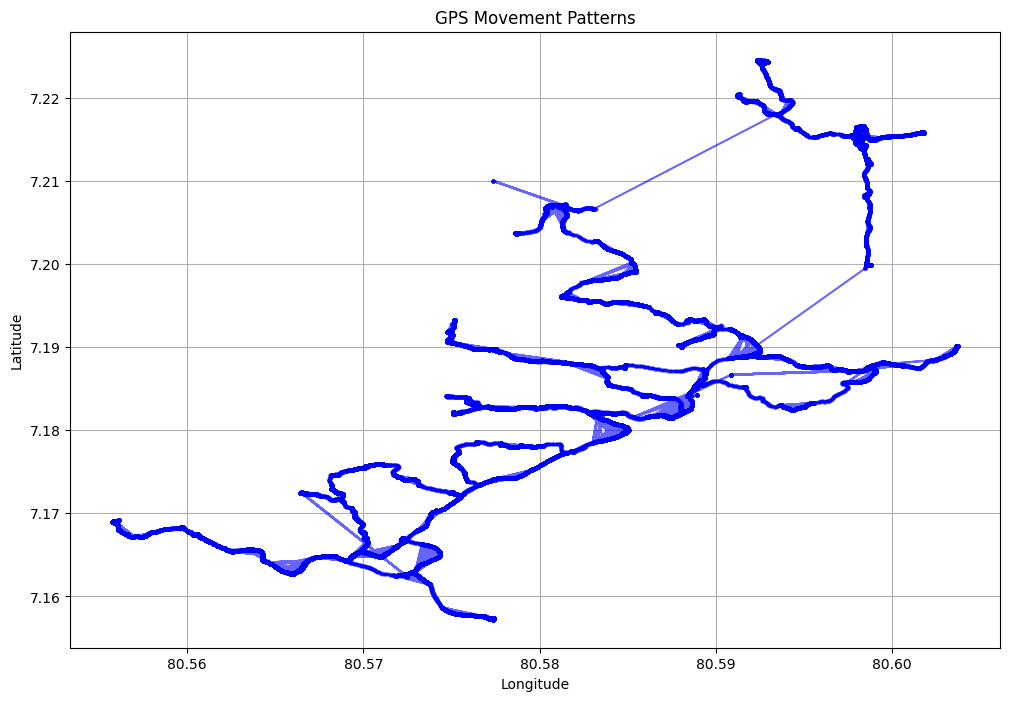

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(df['Longitude'], df['Latitude'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Movement Patterns')
plt.grid(True)
plt.show()

In [14]:
features = df[['Longitude', 'Latitude']]

In [23]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

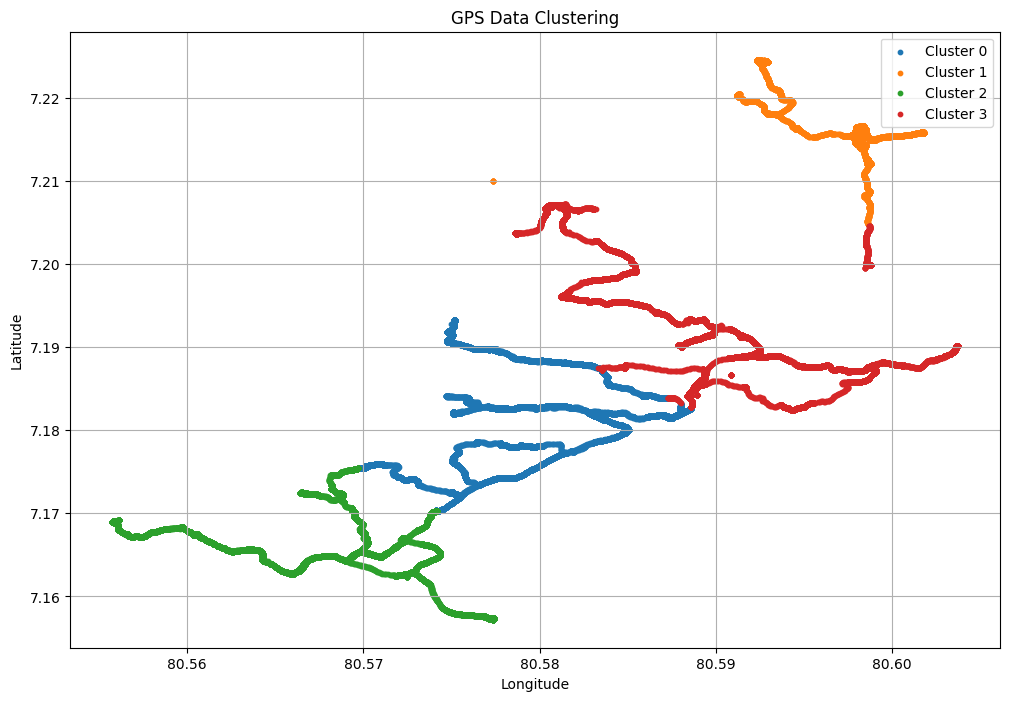

In [24]:
plt.figure(figsize=(12, 8))
for cluster in range(num_clusters):
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data['Longitude'], clustered_data['Latitude'], s=10, label=f'Cluster {cluster}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Data Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
gps_data = pd.read_csv('../data/gps.csv')

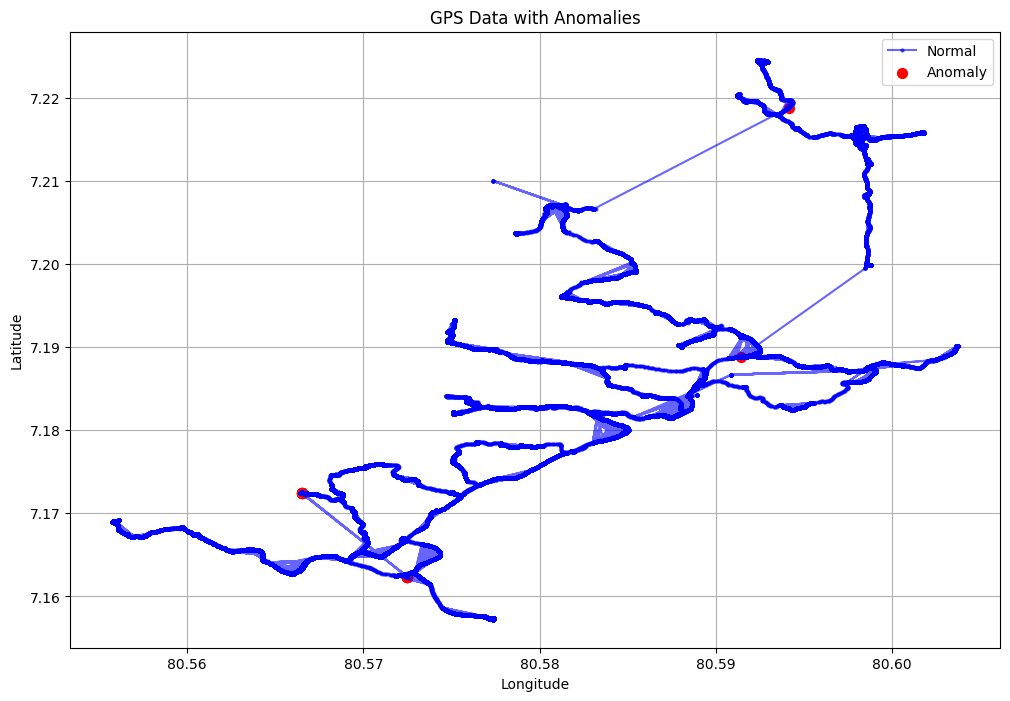

ModuleNotFoundError: No module named 'ace_tools'

In [29]:
# Function to calculate Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # Radius of the Earth in km
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Calculate distances between consecutive points
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)

# Identify anomalies (e.g., distance > 1 km in a short time interval)
distance_threshold = 1.0  # 1 km
gps_data['Anomaly'] = gps_data['Distance_km'] > distance_threshold

# Plot the anomalies
plt.figure(figsize=(12, 8))
plt.plot(gps_data['Longitude'], gps_data['Latitude'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6, label='Normal')
plt.scatter(gps_data[gps_data['Anomaly']]['Longitude'], gps_data[gps_data['Anomaly']]['Latitude'], color='r', s=50, label='Anomaly')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Data with Anomalies')
plt.legend()
plt.grid(True)
plt.show()

# Display the anomalies in a table
anomalies = gps_data[gps_data['Anomaly']]
import ace_tools as tools; tools.display_dataframe_to_user(name="GPS Data Anomalies", dataframe=anomalies)

anomalies.head()
